## Handwritten Digit Recognition Dataset

### Loading the MNIST dataset in Keras

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Using TensorFlow backend.


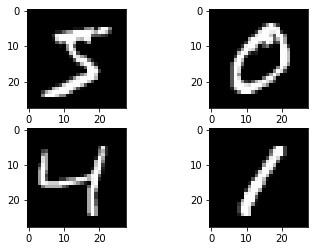

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Baseline Model with Multilayer Perceptrons

#### Importing Classes and Functions

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

#### Initializing The Random Number Generator

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#### Load the MNIST Dataset

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Preparing MNIST Dataset For Modeling

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#### Normalizing Pixel Values

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#### One Hot Encode The Output Variable

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#### Define and Compile the Baseline Model

In [9]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal' , activation='relu' ))
    model.add(Dense(num_classes, init='normal' , activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
    return model

#### Evaluate the Baseline Model

In [10]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  """
C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  
C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 19s - loss: 0.2809 - accuracy: 0.9207 - val_loss: 0.1415 - val_accuracy: 0.9572
Epoch 2/10
 - 22s - loss: 0.1116 - accuracy: 0.9678 - val_loss: 0.0918 - val_accuracy: 0.9710
Epoch 3/10
 - 24s - loss: 0.0715 - accuracy: 0.9797 - val_loss: 0.0776 - val_accuracy: 0.9776
Epoch 4/10
 - 22s - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0742 - val_accuracy: 0.9771
Epoch 5/10
 - 22s - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.0676 - val_accuracy: 0.9792
Epoch 6/10
 - 25s - loss: 0.0269 - accuracy: 0.9926 - val_loss: 0.0625 - val_accuracy: 0.9810
Epoch 7/10
 - 27s - loss: 0.0205 - accuracy: 0.9948 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 8/10
 - 29s - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.0604 - val_accuracy: 0.9811
Epoch 9/10
 - 25s - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0563 - val_accuracy: 0.9824
Epoch 10/10
 - 25s - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0576 - val_accuracy: 0.9822
Baseline 

## Simple Convolutional Neural Network for MNIST

#### Below summarizes the network architecture.
1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32
feature maps, which with the size of 5 ⇥ 5 and a rectifier activation function. This is the
input layer, expecting images with the structure outline above.
2. Next we define a pooling layer that takes the maximum value called MaxPooling2D. It is
configured with a pool size of 2 ⇥ 2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to
randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the
output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function is used.
6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function
to output probability-like predictions for each class

### Importing classes and functions

In [41]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


In [42]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

### Seed Random Number Generator

In [43]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Load Dataset and Separate Into Train and Test Sets

In [44]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

###  Normalize and One Hot Encode Data

In [45]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Defining and Compiling CNN Model

In [46]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Fit and Evaluate The CNN Model

In [47]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 40s - loss: 0.2584 - accuracy: 0.9266 - val_loss: 0.1007 - val_accuracy: 0.9700
Epoch 2/10
 - 43s - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0652 - val_accuracy: 0.9799
Epoch 3/10
 - 43s - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0607 - val_accuracy: 0.9799
Epoch 4/10
 - 42s - loss: 0.0488 - accuracy: 0.9841 - val_loss: 0.0502 - val_accuracy: 0.9838
Epoch 5/10
 - 36s - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0424 - val_accuracy: 0.9851
Epoch 6/10
 - 39s - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0474 - val_accuracy: 0.9846
Epoch 7/10
 - 39s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 8/10
 - 39s - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 9/10
 - 37s - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 10/10
 - 36s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0375 - val_accuracy: 0.9875
CNN Error

## Larger Convolutional Neural Network for MNIST

### The network topology can be summarized as follows.
1. Convolutional layer with 30 feature maps of size 5 ⇥ 5.
2. Pooling layer taking the max over 2 ⇥ 2 patches.
3. Convolutional layer with 15 feature maps of size 3 ⇥ 3.
4. Pooling layer taking the max over 2 ⇥ 2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [58]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


In [59]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [63]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]




In [64]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [65]:

# build the model
model = larger_model()


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  import sys
C:\Users\USER\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 55s - loss: 0.4476 - accuracy: 0.8643 - val_loss: 0.1216 - val_accuracy: 0.9652
Epoch 2/10
 - 49s - loss: 0.1288 - accuracy: 0.9609 - val_loss: 0.0841 - val_accuracy: 0.9720
Epoch 3/10
 - 55s - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.0603 - val_accuracy: 0.9799
Epoch 4/10
 - 53s - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0508 - val_accuracy: 0.9842
Epoch 5/10
 - 48s - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 6/10
 - 48s - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.0445 - val_accuracy: 0.9865
Epoch 7/10
 - 50s - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0474 - val_accuracy: 0.9851
Epoch 8/10
 - 50s - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 9/10
 - 49s - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.0361 - val_accuracy: 0.9875
Epoch 10/10
 - 54s - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0372 - val_accuracy: 0.9876
Large CNN